In [116]:
# if you want to temporarily upload the datasets, ignore this
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:

#use your own drive path here
#Shubhnoor path
#path = "/content/drive/MyDrive/Colab Notebooks/MMAI 869 - Team Assignment/LoanData/"

#Lauren Path
path =  "/content/drive/MyDrive/Colab Notebooks/Group Assignment - Zindi Competition/MMAI 869 Team Assignment Shared Google Folder/Dataset - Zindi Loan Default Prediction/"
pathdata =  "/content/drive/MyDrive/Colab Notebooks/Group Assignment - Zindi Competition/MMAI 869 Team Assignment Shared Google Folder/Data Cleaning/"

#Andre's Path
#path = "/content/drive/My Drive/Education/Notes/MMAI 869 - Machine Learning and AI Technology/Assignments/Team/MMAI 869 Team Assignment Shared Google Folder/Dataset - Zindi Loan Default Prediction/"

#Sam Xie's Path
#path = "/content/drive/MyDrive/869_datasets/"

#Marc's Path
#path = "/content/drive/MyDrive/Colab Notebooks/Data/"


In [118]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sn
import random
import datetime as dt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [119]:
traindemo = pd.read_csv(path + "traindemographics.csv", parse_dates=['birthdate'])
testdemo = pd.read_csv(path + "testdemographics.csv", parse_dates=['birthdate'])
testperf = pd.read_csv(path + "testperf.csv", parse_dates=['approveddate','creationdate'])
testprevloans = pd.read_csv(path + "testprevloans.csv", parse_dates=['approveddate','creationdate','closeddate',
                                                                           'firstduedate','firstrepaiddate'])

In [120]:
# Combine train and test demographics
traindemo = pd.concat([traindemo, testdemo], ignore_index=True)

In [121]:
print(traindemo.shape)
print(testprevloans.shape)

(5833, 9)
(5907, 12)


In [122]:
# List of DataFrame names and their corresponding variables
df_names = ['traindemo', 'testdemo', 'testperf', 'testprevloans']
dfs = [traindemo, testdemo, testperf, testprevloans]

# Iterate through each DataFrame
for name, df in zip(df_names, dfs):
    # Print the number of duplicates
    num_duplicates = df.duplicated().sum()
    print(f"{name} has {num_duplicates} duplicate rows.")

    # Drop duplicates
    df.drop_duplicates(inplace=True)

# Now each DataFrame in the list 'dfs' has duplicates removed

traindemo has 15 duplicate rows.
testdemo has 3 duplicate rows.
testperf has 0 duplicate rows.
testprevloans has 0 duplicate rows.


In [123]:
# List of DataFrame names and their corresponding variables
df_names = ['traindemo', 'testdemo', 'testperf', 'testprevloans']
dfs = [traindemo, testdemo, testperf, testprevloans]

# Check for duplicates in each DataFrame
for name, df in zip(df_names, dfs):
    # Count duplicates
    num_duplicates = df.duplicated().sum()

    # Check if duplicates exist
    if num_duplicates == 0:
        print(f"No duplicates found in {name}.")
    else:
        print(f"Warning: {num_duplicates} duplicates found in {name}.")


No duplicates found in traindemo.
No duplicates found in testdemo.
No duplicates found in testperf.
No duplicates found in testprevloans.


In [124]:
print(traindemo.shape)
print(testprevloans.shape)

(5818, 9)
(5907, 12)


### Merge Test DF on demographic + current loans

In [125]:
#perform same merge on the test dfs
# Perform a left merge
testdf = testperf.merge(traindemo, on='customerid',how = 'left')
testdf.shape

(1450, 17)

In [126]:
testdf.columns

Index(['customerid', 'systemloanid', 'loannumber', 'approveddate',
       'creationdate', 'loanamount', 'totaldue', 'termdays', 'referredby',
       'birthdate', 'bank_account_type', 'longitude_gps', 'latitude_gps',
       'bank_name_clients', 'bank_branch_clients', 'employment_status_clients',
       'level_of_education_clients'],
      dtype='object')

In [127]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   customerid                  1450 non-null   object        
 1   systemloanid                1450 non-null   int64         
 2   loannumber                  1450 non-null   int64         
 3   approveddate                1450 non-null   object        
 4   creationdate                1450 non-null   object        
 5   loanamount                  1450 non-null   int64         
 6   totaldue                    1450 non-null   float64       
 7   termdays                    1450 non-null   int64         
 8   referredby                  184 non-null    object        
 9   birthdate                   1450 non-null   datetime64[ns]
 10  bank_account_type           1450 non-null   object        
 11  longitude_gps               1450 non-null   float64     

In [128]:
testdf.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,longitude_gps,latitude_gps
count,1.450000e+03,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
mean,3.019807e+08,5.088966,17482.758621,20874.664069,28.810345,4.684710,7.122337
std,1.339572e+04,3.665210,10585.420034,11726.584630,11.074839,5.451703,3.217316
min,3.019585e+08,2.000000,10000.000000,10500.000000,15.000000,-97.883895,-74.005974
25%,3.019687e+08,2.000000,10000.000000,13000.000000,30.000000,3.355011,6.468007
50%,3.019799e+08,4.000000,10000.000000,13000.000000,30.000000,3.631645,6.617392
75%,3.019929e+08,7.000000,20000.000000,24500.000000,30.000000,6.579547,7.421223
max,3.020040e+08,34.000000,60000.000000,68100.000000,90.000000,116.296503,55.004022


In [129]:
testdf.isnull().sum()

customerid                       0
systemloanid                     0
loannumber                       0
approveddate                     0
creationdate                     0
loanamount                       0
totaldue                         0
termdays                         0
referredby                    1266
birthdate                        0
bank_account_type                0
longitude_gps                    0
latitude_gps                     0
bank_name_clients                0
bank_branch_clients           1428
employment_status_clients      208
level_of_education_clients    1260
dtype: int64

In [130]:
print("----------")
testdf.employment_status_clients.value_counts()
print("\n----------")
testdf.level_of_education_clients.value_counts()
print("\n----------")
testdf.referredby.value_counts()
print("\n----------")
testdf.bank_account_type.value_counts()

----------


Permanent        1075
Self-Employed     102
Student            47
Unemployed         17
Retired             1
Name: employment_status_clients, dtype: int64


----------


Graduate         132
Secondary         30
Post-Graduate     24
Primary            4
Name: level_of_education_clients, dtype: int64


----------


8a858f5b5bee1b11015bee3c86711191    2
8a858f385b34d285015b368d23720716    2
8a858edb552adcfd015546aebb4f0717    2
8a858eb25b5d2e82015b5d35c1bb094d    2
8a858ee0560bc07701561585ea777a43    2
                                   ..
8a858f455b5d1896015b5d192a1d0090    1
8a858fca5c35df2c015c393bc8e00879    1
8a858f275c451af5015c54543f824e92    1
8a858f1b5b256bc9015b2f998c4d6822    1
8a858ff259d1429e0159d2d0194c4b8e    1
Name: referredby, Length: 178, dtype: int64


----------


Savings    1153
Other       281
Current      16
Name: bank_account_type, dtype: int64

### Filling NaN values

In [131]:
testdf["employment_status_clients"] = testdf["employment_status_clients"].fillna("Permanent")
testdf["level_of_education_clients"] = testdf["level_of_education_clients"].fillna("Others")
testdf['referredby'] = testdf['referredby'].notnull().astype('int')

In [132]:
print("----------")
testdf.employment_status_clients.value_counts()
print("\n----------")
testdf.level_of_education_clients.value_counts()
print("\n----------")
testdf.referredby.value_counts()
print("\n----------")
testdf.bank_account_type.value_counts()

----------


Permanent        1283
Self-Employed     102
Student            47
Unemployed         17
Retired             1
Name: employment_status_clients, dtype: int64


----------


Others           1260
Graduate          132
Secondary          30
Post-Graduate      24
Primary             4
Name: level_of_education_clients, dtype: int64


----------


0    1266
1     184
Name: referredby, dtype: int64


----------


Savings    1153
Other       281
Current      16
Name: bank_account_type, dtype: int64

### Converting birthdate to Age

In [133]:
#Calculating Age and adding the new feature to the dataframe - using 2017 as data is from 2017 and we want to get age at time of loan request
testdf['Age'] = 2017 - testdf.birthdate.dt.year

#Dropping the birthdate feature
testdf = testdf.drop(['birthdate'], axis=1)

# New Features

In [134]:
# Check if the column has any duplicates
not testdf['customerid'].duplicated().any()

True

In [135]:
# Creating a binary column indicating if the employment status is 'Employed'
testdf['employed'] = testdf['employment_status_clients'].isin(['Employed', 'Self-Employed', 'Contract']).astype(int)

In [136]:
# Creating a binary column indicating if the customer provided education information
testdf['no_education_info'] = (testdf['level_of_education_clients'] == 'Others').astype(int)

In [137]:
# Binning the loan amounts into categories
bins = [0, 10000, 20000, 60000, float('inf')]
labels = ['Low', 'Medium', 'High', 'Very High']
testdf['loan_amount_category'] = pd.cut(testdf['loanamount'], bins=bins, labels=labels)

In [138]:
# Creating a binary column indicating if the customer has a specific bank account type
testdf['is_savings_account'] = (testdf['bank_account_type'] == 'Savings').astype(int)

In [139]:
# Calculating the ratio of loan amount to total due
testdf['loan_amount_to_total_due_ratio'] = testdf['loanamount'] / testdf['totaldue']

In [140]:
# Calculating the total amount payable per day of the loan term
testdf['daily_payment'] = testdf['totaldue'] / testdf['termdays']

In [141]:
# Creating a binary column for whether the bank branch information is available
testdf['has_branch_info'] = testdf['bank_branch_clients'].notnull().astype(int)

#Dropping the bank_branch_clients feature
testdf = testdf.drop(['bank_branch_clients'], axis=1)

In [142]:
#removed until hear back from stephen on question
#def time_to_decimal_hours(time_str):
 #   """Converts a time string in 'hours:minutes.seconds' format to decimal hours."""
 #   hours, minutes_seconds = time_str.split(':')
 #   minutes, seconds = minutes_seconds.split('.')
 #   total_hours = int(hours) + int(minutes) / 60 + int(seconds) / 3600
 #   return total_hours

# Apply the conversion to the DataFrame columns
#testdf['approveddate_hours'] = testdf['approveddate'].apply(time_to_decimal_hours)
#testdf['creationdate_hours'] = testdf['creationdate'].apply(time_to_decimal_hours)

# Subtract to find the difference
#testdf['duration_hours'] = testdf['approveddate_hours'] - testdf['creationdate_hours']


In [143]:
#testdf['duration_hours'].describe()

In [144]:
#testdf['duration_hours'].info()

In [145]:
# Filter the DataFrame for negative values in 'duration_hours'
#negative_values_df = testdf[testdf['duration_hours'] < 0]

#negative_values_df.head(30)


# New Location Feature - Created Clusters using K-Means

In [146]:
import folium
from folium.plugins import HeatMap
folium_map = folium.Map(location = [6.622782, 3.584222], # Adjust this Lat, Long to a datapoint from your dataset, it marks where the map starts when it is loaded
                        zoom_start = 9) # The zoom indicates how close you want the map to be shown

data_zip = zip(
    testdf['latitude_gps'], # Here it goes your Latitude feature
    testdf['longitude_gps'], # Here it goes your Longitude feature
    #testdf['good_bad_flag'] # Here it goes your Target feature
    )
list_of_data_zip = list(data_zip)

hm_layer = HeatMap(list_of_data_zip,
                  min_opacity=0.7,
                  radius=8,
                  blur=15,
                  )

folium_map.add_child(hm_layer)
folium_map

In [147]:
# Clustering geographical coordinates using K-means
from sklearn.cluster import KMeans, AgglomerativeClustering

from sklearn.metrics import silhouette_score, silhouette_samples

In [148]:
X = testdf[['customerid', 'longitude_gps', 'latitude_gps']].copy()
X.shape

(1450, 3)

In [149]:
import joblib #loading the model set in train

In [150]:
loaded_cluster = joblib.load(path + 'hierarchical_clustering_model.joblib')
X['location_cluster'] = loaded_cluster.fit_predict(X[['longitude_gps', 'latitude_gps']]) #agglomerative clustering doesnot have predict function
X['location_cluster']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0       1
1       1
2       1
3       1
4       1
       ..
1445    1
1446    1
1447    1
1448    1
1449    1
Name: location_cluster, Length: 1450, dtype: int64

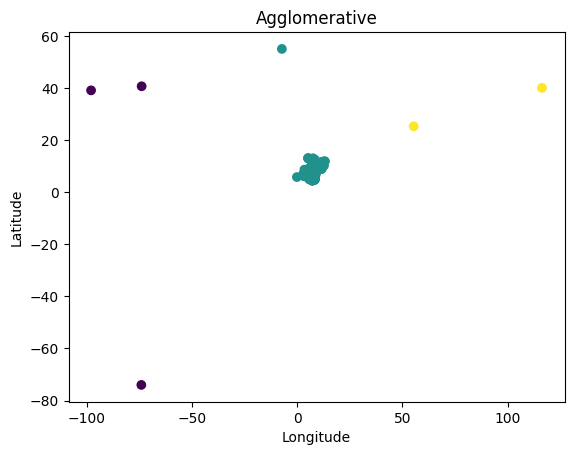

In [151]:
plt.figure();

plt.scatter(X.iloc[:, 1], X.iloc[:, 2], c=loaded_cluster.labels_);
plt.title("Agglomerative");
plt.xlabel('Longitude');
plt.ylabel('Latitude');

In [152]:
# Merge the 'location_cluster' column from X to testdf based on 'customerid'
testdf = pd.merge(testdf, X[['customerid', 'location_cluster']], on='customerid', how='left')
testdf

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,employed,no_education_info,loan_amount_category,is_savings_account,loan_amount_to_total_due_ratio,daily_payment,has_branch_info,location_cluster
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,0,Other,5.835219,8.274730,First Bank,Permanent,Others,34,0,1,Low,0,0.816327,408.333333,0,1
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,0,Savings,3.245768,6.601778,First Bank,Permanent,Others,31,0,1,High,1,0.909091,1466.666667,0,1
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,0,Savings,3.227945,6.586668,UBA,Permanent,Others,36,0,1,Medium,1,0.816327,816.666667,0,1
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,0,Savings,6.106486,7.287064,Zenith Bank,Permanent,Others,40,0,1,High,1,0.869565,1150.000000,0,1
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,0,Savings,5.248368,13.059864,UBA,Permanent,Others,42,0,1,Medium,1,0.816327,816.666667,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,8a858fb45bb59c21015bb88a191f58f2,301991141,3,47:02.0,46:53.0,10000,11500.0,15,0,Savings,3.379678,6.541521,First Bank,Permanent,Others,27,0,1,Low,1,0.869565,766.666667,0,1
1446,8a858fcb5b00cc54015b0253ced26a5f,301963018,3,00:45.0,04:05.0,10000,13000.0,30,0,Savings,3.350815,6.583876,GT Bank,Permanent,Others,40,0,1,Low,1,0.769231,433.333333,0,1
1447,8a858fde56eb02280156f59b976d46c0,301994653,9,09:40.0,09:33.0,40000,48000.0,60,0,Savings,6.723491,6.201512,Diamond Bank,Permanent,Others,23,0,1,High,1,0.833333,800.000000,0,1
1448,8a858e10570f2d65015717fcfec44996,301961483,14,47:54.0,46:49.0,60000,68100.0,90,0,Other,3.547064,6.864409,Union Bank,Permanent,Others,28,0,1,High,0,0.881057,756.666667,0,1


In [153]:
testdf.location_cluster.value_counts()

1    1445
0       3
2       2
Name: location_cluster, dtype: int64

#New DateTime Features

In [154]:
# Creating a binary column indicating if the loan term is short or long
testdf['is_short_term'] = (testdf['termdays'] <= 30).astype(int)

In [155]:
testdf.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,employed,no_education_info,loan_amount_category,is_savings_account,loan_amount_to_total_due_ratio,daily_payment,has_branch_info,location_cluster,is_short_term
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,0,Other,5.835219,8.274730,First Bank,Permanent,Others,34,0,1,Low,0,0.816327,408.333333,0,1,1
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,0,Savings,3.245768,6.601778,First Bank,Permanent,Others,31,0,1,High,1,0.909091,1466.666667,0,1,1
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,0,Savings,3.227945,6.586668,UBA,Permanent,Others,36,0,1,Medium,1,0.816327,816.666667,0,1,1
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,0,Savings,6.106486,7.287064,Zenith Bank,Permanent,Others,40,0,1,High,1,0.869565,1150.000000,0,1,1
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,0,Savings,5.248368,13.059864,UBA,Permanent,Others,42,0,1,Medium,1,0.816327,816.666667,0,1,1


In [156]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450 entries, 0 to 1449
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   customerid                      1450 non-null   object  
 1   systemloanid                    1450 non-null   int64   
 2   loannumber                      1450 non-null   int64   
 3   approveddate                    1450 non-null   object  
 4   creationdate                    1450 non-null   object  
 5   loanamount                      1450 non-null   int64   
 6   totaldue                        1450 non-null   float64 
 7   termdays                        1450 non-null   int64   
 8   referredby                      1450 non-null   int64   
 9   bank_account_type               1450 non-null   object  
 10  longitude_gps                   1450 non-null   float64 
 11  latitude_gps                    1450 non-null   float64 
 12  bank_name_clients   

# Data Aggregation at Customer Level

Note: .astype(int): Converts the boolean array obtained into an integer array, where True becomes 1 and False becomes 0.

In [157]:
testprevcopy = testprevloans.copy()

#grouping by 'customerid'
grouped_df = testprevcopy.groupby('customerid')
grouped_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a858899538ddb8e015390510b321f08,301621635,3,2016-05-17 10:37:00,2016-05-17 09:36:55,10000.0,13000.0,30,2016-06-17 00:04:15,NaN,2016-06-16,2016-06-16 15:44:08
1,8a858959537a097401537a4e316e25f7,301810201,5,2017-02-04 21:28:59,2017-02-04 20:28:52,30000.0,36800.0,60,2017-03-02 16:22:58,NaN,2017-03-06,2017-03-02 16:07:47
2,8a858959537a097401537a4e316e25f7,301831255,6,2017-03-04 10:28:22,2017-03-04 09:28:16,30000.0,34400.0,30,2017-04-02 00:44:24,NaN,2017-04-03,2017-04-01 21:29:46
3,8a8589c253ace09b0153af6ba58f1f31,301627292,3,2016-06-02 14:27:14,2016-06-02 13:27:08,10000.0,13000.0,30,2016-07-04 11:34:04,NaN,2016-07-04,2016-07-04 11:19:01
4,8a8589c253ace09b0153af6ba58f1f31,301621095,2,2016-05-16 09:13:12,2016-05-16 08:13:04,10000.0,11500.0,15,2016-06-02 00:02:58,NaN,2016-05-31,2016-06-01 15:22:34
...,...,...,...,...,...,...,...,...,...,...,...,...
5902,8a858f085b494826015b54a0b2a1093b,301861709,1,2017-04-09 23:04:32,2017-04-09 22:04:10,10000.0,13000.0,30,2017-05-02 22:27:03,8a858e4f5929c3df0159420645f46f55,2017-05-09,2017-05-02 22:11:54
5903,8a858f565b683b56015b7391c2617960,301869817,1,2017-04-15 23:33:17,2017-04-15 22:33:05,10000.0,11500.0,15,2017-04-25 19:32:42,NaN,2017-05-02,2017-04-25 19:17:33
5904,8a858fab5b9105dc015b975e594e394a,301952446,1,2017-06-26 15:46:28,2017-06-26 14:45:20,10000.0,13000.0,30,2017-07-13 13:12:43,NaN,2017-07-26,2017-07-13 13:02:34
5905,8a858fcf5b39c3ba015b39c7691603e1,301887884,2,2017-05-03 06:56:10,2017-05-03 05:56:04,10000.0,13000.0,30,2017-06-01 22:00:17,NaN,2017-06-02,2017-06-01 21:50:07


In [158]:
# Performing aggregations
aggregated_df = grouped_df.agg({
    'loanamount': ['sum', 'mean', 'median', 'max', 'min'],  # Various aggregations for loan amount
    'loannumber': 'count', # Counting the number of loans
    'totaldue': ['sum','mean'], #sum and mean of total due from all previous loans
    'termdays': ['max', 'min','mean'],  # Max, min and mean for term days
    # Add other aggregations as needed
}).reset_index()

# Flattening the MultiIndex in columns
aggregated_df.columns = ['_'.join(col).strip() for col in aggregated_df.columns.values]

#remove '_' from customerid column
aggregated_df.rename(columns= {'customerid_':'customerid'}, inplace= True)

# Displaying the first few rows of the aggregated DataFrame
aggregated_df.head()

aggregated_df.shape

,customerid,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean
0,8a28afc7474813a40147639ec637156b,178000.0,17800.000000,17500.0,30000.0,8000.0,10,210900.0,21090.000000,60,15,31.5
1,8a3735d5518aba7301518ac34413010d,70000.0,11666.666667,10000.0,20000.0,10000.0,6,88000.0,14666.666667,30,15,27.5
2,8a76e7d443e6e97c0143ed099d102b1d,20000.0,10000.000000,10000.0,10000.0,10000.0,2,23000.0,11500.000000,15,15,15.0
3,8a818823525dceef01525deda2480384,170000.0,18888.888889,15000.0,40000.0,5000.0,9,209975.0,23330.555556,60,30,40.0
4,8a818926522ea5ef01523aff15c37482,20000.0,10000.000000,10000.0,10000.0,10000.0,2,26000.0,13000.000000,30,30,30.0


(1442, 12)

**Average interest and fees**

In [159]:
# Calculate the time difference between 'totaldue' and 'loanamount'
testprevcopy['average_interest'] = testprevcopy['totaldue'] - testprevcopy['loanamount']

# Group by 'customerid' and calculate the average interest
average_interest = testprevcopy.groupby('customerid')['average_interest'].mean().reset_index()

# Display the result
average_interest

,customerid,average_interest
0,8a28afc7474813a40147639ec637156b,3290.000000
1,8a3735d5518aba7301518ac34413010d,3000.000000
2,8a76e7d443e6e97c0143ed099d102b1d,1500.000000
3,8a818823525dceef01525deda2480384,4441.666667
4,8a818926522ea5ef01523aff15c37482,3000.000000
...,...,...
1437,8a858fff5a36fe68015a3744f0021e89,2437.500000
1438,8aaae7a74400b28201441c8b62514150,2500.000000
1439,8aab10f748cf78ff0148d11fac1447a6,3000.000000
1440,8aab160f499477da014999ba2f0f578b,1750.000000


**Average Loan Repayment Time**

In [160]:
# Calculate the time difference between 'closeddate' and 'approveddate' in days
testprevcopy['average_repayment_time'] = (testprevcopy['closeddate'] - testprevcopy['approveddate'])/np.timedelta64(1,'D')

# Group by 'customerid' and calculate the average time difference
average_repayment_time = testprevcopy.groupby('customerid')['average_repayment_time'].mean().reset_index()

# Display the result
average_repayment_time

,customerid,average_repayment_time
0,8a28afc7474813a40147639ec637156b,25.965302
1,8a3735d5518aba7301518ac34413010d,14.904429
2,8a76e7d443e6e97c0143ed099d102b1d,13.914896
3,8a818823525dceef01525deda2480384,39.673767
4,8a818926522ea5ef01523aff15c37482,41.128843
...,...,...
1437,8a858fff5a36fe68015a3744f0021e89,14.924060
1438,8aaae7a74400b28201441c8b62514150,24.561327
1439,8aab10f748cf78ff0148d11fac1447a6,34.101586
1440,8aab160f499477da014999ba2f0f578b,20.958561


**Early Repayment Flag**

This code calculates the difference in days between the 'closeddate' and 'approveddate' for each loan, and then checks if this duration is less than the 'termdays'. The resulting 'EarlyRepaymentFlag' is set to 1 if any loan meets this condition and 0 otherwise.

This is actually the average. If the customer closed date before the term date it is 1. If customer closed date before term date 50%of time it is 0.5.

In [161]:
# Calculate the difference between 'closeddate' and 'creationdate'
testprevcopy['repayment_duration'] = (testprevcopy['closeddate'] - testprevcopy['approveddate']).dt.days

# Create the 'EarlyRepaymentFlag' based on the condition
testprevcopy['EarlyRepaymentFlag'] = (testprevcopy['repayment_duration'] < testprevcopy['termdays']).astype(int)

avg_EarlyRepaymentFlag = testprevcopy.groupby('customerid')['EarlyRepaymentFlag'].mean().reset_index()

avg_EarlyRepaymentFlag

,customerid,EarlyRepaymentFlag
0,8a28afc7474813a40147639ec637156b,0.800000
1,8a3735d5518aba7301518ac34413010d,0.833333
2,8a76e7d443e6e97c0143ed099d102b1d,1.000000
3,8a818823525dceef01525deda2480384,0.555556
4,8a818926522ea5ef01523aff15c37482,0.000000
...,...,...
1437,8a858fff5a36fe68015a3744f0021e89,1.000000
1438,8aaae7a74400b28201441c8b62514150,0.666667
1439,8aab10f748cf78ff0148d11fac1447a6,0.000000
1440,8aab160f499477da014999ba2f0f578b,0.333333


**LatePaymentFlag**

This code checks if the 'firstrepaiddate' is greater than the 'firstduedate' for each customer. If this condition is true, 'LatePaymentFlag' is set to 1, indicating that the customer has been late on a payment. Otherwise, it is set to 0.

In [162]:
# Create the 'LatePaymentFlag' based on the condition
testprevcopy['LatePaymentFlag'] = (testprevcopy['firstrepaiddate'] > testprevcopy['firstduedate']).astype(int)
avg_LatePaymentFlag = testprevcopy.groupby('customerid')['LatePaymentFlag'].mean().reset_index()
avg_LatePaymentFlag

,customerid,LatePaymentFlag
0,8a28afc7474813a40147639ec637156b,0.400000
1,8a3735d5518aba7301518ac34413010d,0.166667
2,8a76e7d443e6e97c0143ed099d102b1d,0.000000
3,8a818823525dceef01525deda2480384,0.888889
4,8a818926522ea5ef01523aff15c37482,1.000000
...,...,...
1437,8a858fff5a36fe68015a3744f0021e89,0.000000
1438,8aaae7a74400b28201441c8b62514150,0.333333
1439,8aab10f748cf78ff0148d11fac1447a6,1.000000
1440,8aab160f499477da014999ba2f0f578b,0.666667


In [163]:
#Other features -- added Dec 7

# 1. Number of Loans Initiated on a Weekend
testprevcopy['creation_weekend'] = testprevcopy['creationdate'].dt.weekday >= 5
weekend_loans = testprevcopy.groupby('customerid')['creation_weekend'].sum().reset_index()

# 2. Average Time to Approval
#Calculate the duration between creation date and approved date in hours
# First, find the total duration in seconds and then convert to hours
testprevcopy['time_to_approval'] = (testprevcopy['approveddate'] - testprevcopy['creationdate']).dt.total_seconds() / 3600
average_time_to_approval = testprevcopy.groupby('customerid')['time_to_approval'].mean().reset_index()

# 3. Average Time to First Repayment
testprevcopy['time_to_first_repayment'] = (testprevcopy['firstrepaiddate'] - testprevcopy['approveddate']).dt.days
average_time_to_first_repayment = testprevcopy.groupby('customerid')['time_to_first_repayment'].mean().reset_index()

# 4. Seasonality of Loan Activity
testprevcopy['creation_month'] = testprevcopy['creationdate'].dt.month
loan_activity_by_month = testprevcopy.groupby('customerid')['creation_month'].apply(lambda x: x.mode()[0]).reset_index()


### Perform join on aggregated df to other aggregated dataframes

Add additional columns with calculated fields to aggregated_df (prev loan aggregated data)

In [164]:
# Perform a left merge on each aggregated df to merge it to aggregated_df
#dfs = [average_interest, average_repayment_time, avg_EarlyRepaymentFlag, avg_LatePaymentFlag] # list of dataframes

aggregated_df = aggregated_df.merge(average_interest, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(average_repayment_time, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(avg_EarlyRepaymentFlag, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(avg_LatePaymentFlag, on= 'customerid', how='left')

aggregated_df = aggregated_df.merge(weekend_loans, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(average_time_to_approval, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(average_time_to_first_repayment, on= 'customerid', how='left')
aggregated_df = aggregated_df.merge(loan_activity_by_month, on= 'customerid', how='left')


aggregated_df.head(3)

,customerid,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag,creation_weekend,time_to_approval,time_to_first_repayment,creation_month
0,8a28afc7474813a40147639ec637156b,178000.0,17800.000000,17500.0,30000.0,8000.0,10,210900.0,21090.000000,60,15,31.5,3290.0,25.965302,0.800000,0.400000,2,1.003611,25.500000,6
1,8a3735d5518aba7301518ac34413010d,70000.0,11666.666667,10000.0,20000.0,10000.0,6,88000.0,14666.666667,30,15,27.5,3000.0,14.904429,0.833333,0.166667,0,1.005556,14.166667,6
2,8a76e7d443e6e97c0143ed099d102b1d,20000.0,10000.000000,10000.0,10000.0,10000.0,2,23000.0,11500.000000,15,15,15.0,1500.0,13.914896,1.000000,0.000000,1,1.004583,13.500000,6


#### Check the shape of the 2 dataframes before the merge

In [165]:
print("Test demo+Perf: ",testdf.shape)
print("Aggregated: ",aggregated_df.shape)

Test demo+Perf:  (1450, 25)
Aggregated:  (1442, 20)


### Merge Train DF (demographic + current loans (traindemo, trainperf)) with the prev loan aggregation dataframe

In [166]:
# Perform a left merge
test_aggregated_df = testdf.merge(aggregated_df, on='customerid', how = 'left')

In [167]:
#check shape of aggregated train df
test_aggregated_df.shape

(1450, 44)

In [168]:
test_aggregated_df.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,employed,no_education_info,loan_amount_category,is_savings_account,loan_amount_to_total_due_ratio,daily_payment,has_branch_info,location_cluster,is_short_term,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag,creation_weekend,time_to_approval,time_to_first_repayment,creation_month
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,0,Other,5.835219,8.274730,First Bank,Permanent,Others,34,0,1,Low,0,0.816327,408.333333,0,1,1,26000.0,8666.666667,10000.0,10000.0,6000.0,3.0,32900.0,10966.666667,30.0,15.0,25.000000,2300.000000,28.617388,0.333333,0.666667,0.0,1.001944,27.666667,3.0
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,0,Savings,3.245768,6.601778,First Bank,Permanent,Others,31,0,1,High,1,0.909091,1466.666667,0,1,1,215000.0,23888.888889,30000.0,40000.0,5000.0,9.0,248400.0,27600.000000,60.0,15.0,31.666667,3711.111111,24.689053,0.777778,0.222222,4.0,1.002191,24.000000,3.0
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,0,Savings,3.227945,6.586668,UBA,Permanent,Others,36,0,1,Medium,1,0.816327,816.666667,0,1,1,65000.0,13000.000000,10000.0,20000.0,10000.0,5.0,79675.0,15935.000000,30.0,15.0,27.000000,2935.000000,31.739190,0.400000,0.600000,0.0,1.005389,31.000000,6.0
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,0,Savings,6.106486,7.287064,Zenith Bank,Permanent,Others,40,0,1,High,1,0.869565,1150.000000,0,1,1,120000.0,17142.857143,20000.0,30000.0,10000.0,7.0,135400.0,19342.857143,30.0,15.0,17.142857,2200.000000,13.837419,1.000000,0.000000,1.0,1.006667,13.428571,3.0
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,0,Savings,5.248368,13.059864,UBA,Permanent,Others,42,0,1,Medium,1,0.816327,816.666667,0,1,1,30000.0,10000.000000,10000.0,10000.0,10000.0,3.0,37500.0,12500.000000,30.0,15.0,25.000000,2500.000000,22.252338,1.000000,0.333333,0.0,1.002870,21.666667,4.0


In [169]:
#check null after merge
test_aggregated_df.isnull().sum()

customerid                        0
systemloanid                      0
loannumber                        0
approveddate                      0
creationdate                      0
loanamount                        0
totaldue                          0
termdays                          0
referredby                        0
bank_account_type                 0
longitude_gps                     0
latitude_gps                      0
bank_name_clients                 0
employment_status_clients         0
level_of_education_clients        0
Age                               0
employed                          0
no_education_info                 0
loan_amount_category              0
is_savings_account                0
loan_amount_to_total_due_ratio    0
daily_payment                     0
has_branch_info                   0
location_cluster                  0
is_short_term                     0
loanamount_sum                    8
loanamount_mean                   8
loanamount_median           

In [170]:
#Check rows having missing values
null_mask = test_aggregated_df.isnull().any(axis=1)
null_rows = test_aggregated_df[null_mask]
null_rows

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,employed,no_education_info,loan_amount_category,is_savings_account,loan_amount_to_total_due_ratio,daily_payment,has_branch_info,location_cluster,is_short_term,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag,creation_weekend,time_to_approval,time_to_first_repayment,creation_month
161,8a858ecd57b919a70157c8398b5d5300,301986633,2,43:27.0,43:13.0,10000,13000.0,30,0,Savings,6.533070,9.575809,Diamond Bank,Permanent,Others,40,0,1,Low,1,0.769231,433.333333,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
171,8a858ecc57b9184b0157ba61dab46cbc,301999250,2,56:05.0,54:58.0,10000,13000.0,30,0,Savings,6.954103,6.184677,First Bank,Permanent,Others,39,0,1,Low,1,0.769231,433.333333,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
452,8a858ecc57b9184b0157bd7491b650ec,301996804,2,58:51.0,57:44.0,20000,24500.0,30,1,Savings,3.525146,6.668493,GT Bank,Permanent,Secondary,39,0,0,Medium,1,0.816327,816.666667,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478,8a8589005384ab570153880ceba74594,301964860,3,29:56.0,29:40.0,30000,39000.0,60,0,Other,3.415010,6.444252,GT Bank,Permanent,Graduate,38,0,0,High,0,0.769231,650.000000,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
558,8a858f2d5853901a01585c79a6021b8f,301970405,2,54:24.0,54:05.0,30000,39000.0,60,1,Savings,3.306754,6.511447,GT Bank,Permanent,Graduate,40,0,0,High,1,0.769231,650.000000,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
640,8a858e9f59d692440159da2c60b42106,301977106,2,00:20.0,59:12.0,20000,23000.0,30,0,Savings,3.362373,6.642125,UBA,Permanent,Graduate,32,0,0,Medium,1,0.869565,766.666667,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
644,8a858f0d58a18ebc0158a9bf124b5a30,301989214,2,39:19.0,38:59.0,10000,11500.0,15,0,Savings,3.309237,6.644254,Zenith Bank,Permanent,Graduate,26,0,0,Low,1,0.869565,766.666667,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1413,8a85890253e2f1180153eae33e5e6bc3,301983398,3,00:19.0,59:08.0,20000,24500.0,30,0,Savings,3.373518,6.643441,GT Bank,Permanent,Graduate,29,0,0,Medium,1,0.816327,816.666667,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [171]:
test_aggregated_df.describe()

,systemloanid,loannumber,loanamount,totaldue,termdays,referredby,longitude_gps,latitude_gps,Age,employed,no_education_info,is_savings_account,loan_amount_to_total_due_ratio,daily_payment,has_branch_info,location_cluster,is_short_term,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag,creation_weekend,time_to_approval,time_to_first_repayment,creation_month
count,1.450000e+03,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000,1442.000000
mean,3.019807e+08,5.088966,17482.758621,20874.664069,28.810345,0.126897,4.684710,7.122337,32.922759,0.070345,0.868966,0.795172,0.824239,740.641189,0.015172,0.999310,0.940690,66655.339806,12685.814936,12414.008322,16468.099861,9865.464632,4.096394,79200.390014,15411.470744,30.062413,21.813454,25.458544,2725.655808,23.877844,0.656485,0.389633,0.710125,1.050026,23.022594,4.866852
std,1.339572e+04,3.665210,10585.420034,11726.584630,11.074839,0.332972,5.451703,3.217316,6.201880,0.255815,0.337554,0.403715,0.051894,327.473040,0.122281,0.058738,0.236286,89156.248874,4672.814609,5338.918494,10021.179258,859.247827,3.669708,102585.175693,5215.061805,12.191918,7.471102,6.732470,826.092205,10.842183,0.368587,0.383116,1.057944,0.305419,10.687372,2.092655
min,3.019585e+08,2.000000,10000.000000,10500.000000,15.000000,0.000000,-97.883895,-74.005974,21.000000,0.000000,0.000000,0.000000,0.769231,366.666667,0.000000,0.000000,0.000000,4000.000000,2000.000000,2000.000000,2000.000000,1000.000000,1.000000,5200.000000,2600.000000,15.000000,15.000000,15.000000,600.000000,0.018021,0.000000,0.000000,0.000000,1.001528,0.000000,1.000000
25%,3.019687e+08,2.000000,10000.000000,13000.000000,30.000000,0.000000,3.355011,6.468007,28.250000,0.000000,1.000000,1.000000,0.769231,433.333333,0.000000,1.000000,1.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000,13000.000000,12250.000000,30.000000,15.000000,20.000000,2084.090909,16.458993,0.428571,0.000000,0.000000,1.002583,16.000000,4.000000
50%,3.019799e+08,4.000000,10000.000000,13000.000000,30.000000,0.000000,3.631645,6.617392,32.000000,0.000000,1.000000,1.000000,0.816327,766.666667,0.000000,1.000000,1.000000,30000.000000,10000.000000,10000.000000,10000.000000,10000.000000,3.000000,36000.000000,13000.000000,30.000000,15.000000,30.000000,3000.000000,24.076999,0.750000,0.333333,0.000000,1.004167,23.126984,5.000000
75%,3.019929e+08,7.000000,20000.000000,24500.000000,30.000000,0.000000,6.579547,7.421223,37.000000,0.000000,1.000000,1.000000,0.869565,816.666667,0.000000,1.000000,1.000000,80000.000000,14000.000000,10000.000000,20000.000000,10000.000000,6.000000,93712.500000,16833.333333,30.000000,30.000000,30.000000,3000.000000,29.417607,1.000000,0.666667,1.000000,1.018611,28.333333,6.000000
max,3.020040e+08,34.000000,60000.000000,68100.000000,90.000000,1.000000,116.296503,55.004022,55.000000,1.000000,1.000000,1.000000,0.956938,2090.000000,1.000000,2.000000,1.000000,701000.000000,34250.000000,40000.000000,60000.000000,20000.000000,33.000000,764875.000000,38243.750000,90.000000,30.000000,54.230769,5875.000000,152.166254,1.000000,1.000000,14.000000,6.646389,151.666667,12.000000


In [172]:
# List of customer IDs to update
customer_ids_to_update = [
    '8a858ecd57b919a70157c8398b5d5300',
    '8a858ecc57b9184b0157ba61dab46cbc',
    '8a858ecc57b9184b0157bd7491b650ec',
    '8a8589005384ab570153880ceba74594',
    '8a858f2d5853901a01585c79a6021b8f',
    '8a858e9f59d692440159da2c60b42106',
    '8a858f0d58a18ebc0158a9bf124b5a30',
    '8a85890253e2f1180153eae33e5e6bc3'
]

In [173]:
# Iterate through customer IDs and update the original DataFrame
for customer_id in customer_ids_to_update:
    matching_rows = test_aggregated_df[test_aggregated_df['customerid'] == customer_id]

    # Check if there are matching rows
    if not matching_rows.empty:
        original_idx = matching_rows.index[0]
        test_aggregated_df.at[original_idx, 'loanamount_sum'] = test_aggregated_df.at[original_idx, 'loanamount']
        test_aggregated_df.at[original_idx, 'loanamount_mean'] = test_aggregated_df.at[original_idx, 'loanamount']
        test_aggregated_df.at[original_idx, 'loanamount_median'] = test_aggregated_df.at[original_idx, 'loanamount']
        test_aggregated_df.at[original_idx, 'loanamount_max'] = test_aggregated_df.at[original_idx, 'loanamount']
        test_aggregated_df.at[original_idx, 'loanamount_min'] = test_aggregated_df.at[original_idx, 'loanamount']
        test_aggregated_df.at[original_idx, 'loannumber_count'] = test_aggregated_df.at[original_idx, 'loannumber']
        test_aggregated_df.at[original_idx, 'totaldue_sum'] = test_aggregated_df.at[original_idx, 'totaldue']
        test_aggregated_df.at[original_idx, 'totaldue_mean'] = test_aggregated_df.at[original_idx, 'totaldue']
        test_aggregated_df.at[original_idx, 'termdays_max'] = test_aggregated_df.at[original_idx, 'termdays']
        test_aggregated_df.at[original_idx, 'termdays_min'] = test_aggregated_df.at[original_idx, 'termdays']
        test_aggregated_df.at[original_idx, 'termdays_mean'] = test_aggregated_df.at[original_idx, 'termdays']
        test_aggregated_df.at[original_idx, 'average_interest'] = test_aggregated_df.at[original_idx, 'totaldue'] - test_aggregated_df.at[original_idx, 'loanamount']
        test_aggregated_df.at[original_idx, 'average_repayment_time'] = 23.877844	 # using median values of train average_repayment_time
        test_aggregated_df.at[original_idx, 'EarlyRepaymentFlag'] = 0.656485	      # using median values of train EarlyRepaymentFlag
        test_aggregated_df.at[original_idx, 'LatePaymentFlag'] = 0.389633	        # using median values of train LatePaymentFlag

        test_aggregated_df.at[original_idx, 'creation_weekend'] = 0.710125	 # using mean
        test_aggregated_df.at[original_idx, 'time_to_approval'] = 1.050026		      # using mean
        test_aggregated_df.at[original_idx, 'time_to_first_repayment'] = 23.022594	         # using mean
        test_aggregated_df.at[original_idx, 'creation_month'] = 4.866852	        # using mean


    else:
        print(f"No matching rows found for customer ID {customer_id}")

# Print the updated original DataFrame
test_aggregated_df.head()


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age,employed,no_education_info,loan_amount_category,is_savings_account,loan_amount_to_total_due_ratio,daily_payment,has_branch_info,location_cluster,is_short_term,loanamount_sum,loanamount_mean,loanamount_median,loanamount_max,loanamount_min,loannumber_count,totaldue_sum,totaldue_mean,termdays_max,termdays_min,termdays_mean,average_interest,average_repayment_time,EarlyRepaymentFlag,LatePaymentFlag,creation_weekend,time_to_approval,time_to_first_repayment,creation_month
0,8a858899538ddb8e015390510b321f08,301998974,4,40:48.0,39:35.0,10000,12250.0,30,0,Other,5.835219,8.274730,First Bank,Permanent,Others,34,0,1,Low,0,0.816327,408.333333,0,1,1,26000.0,8666.666667,10000.0,10000.0,6000.0,3.0,32900.0,10966.666667,30.0,15.0,25.000000,2300.000000,28.617388,0.333333,0.666667,0.0,1.001944,27.666667,3.0
1,8a858959537a097401537a4e316e25f7,301963615,10,43:40.0,42:34.0,40000,44000.0,30,0,Savings,3.245768,6.601778,First Bank,Permanent,Others,31,0,1,High,1,0.909091,1466.666667,0,1,1,215000.0,23888.888889,30000.0,40000.0,5000.0,9.0,248400.0,27600.000000,60.0,15.0,31.666667,3711.111111,24.689053,0.777778,0.222222,4.0,1.002191,24.000000,3.0
2,8a8589c253ace09b0153af6ba58f1f31,301982236,6,15:11.0,15:04.0,20000,24500.0,30,0,Savings,3.227945,6.586668,UBA,Permanent,Others,36,0,1,Medium,1,0.816327,816.666667,0,1,1,65000.0,13000.000000,10000.0,20000.0,10000.0,5.0,79675.0,15935.000000,30.0,15.0,27.000000,2935.000000,31.739190,0.400000,0.600000,0.0,1.005389,31.000000,6.0
3,8a858e095aae82b7015aae86ca1e030b,301971730,8,00:54.0,00:49.0,30000,34500.0,30,0,Savings,6.106486,7.287064,Zenith Bank,Permanent,Others,40,0,1,High,1,0.869565,1150.000000,0,1,1,120000.0,17142.857143,20000.0,30000.0,10000.0,7.0,135400.0,19342.857143,30.0,15.0,17.142857,2200.000000,13.837419,1.000000,0.000000,1.0,1.006667,13.428571,3.0
4,8a858e225a28c713015a30db5c48383d,301959177,4,04:33.0,04:27.0,20000,24500.0,30,0,Savings,5.248368,13.059864,UBA,Permanent,Others,42,0,1,Medium,1,0.816327,816.666667,0,1,1,30000.0,10000.000000,10000.0,10000.0,10000.0,3.0,37500.0,12500.000000,30.0,15.0,25.000000,2500.000000,22.252338,1.000000,0.333333,0.0,1.002870,21.666667,4.0


In [174]:
#check shape of aggregated train df
test_aggregated_df.shape

(1450, 44)

In [175]:
#check null after merge
test_aggregated_df.isnull().sum()

customerid                        0
systemloanid                      0
loannumber                        0
approveddate                      0
creationdate                      0
loanamount                        0
totaldue                          0
termdays                          0
referredby                        0
bank_account_type                 0
longitude_gps                     0
latitude_gps                      0
bank_name_clients                 0
employment_status_clients         0
level_of_education_clients        0
Age                               0
employed                          0
no_education_info                 0
loan_amount_category              0
is_savings_account                0
loan_amount_to_total_due_ratio    0
daily_payment                     0
has_branch_info                   0
location_cluster                  0
is_short_term                     0
loanamount_sum                    0
loanamount_mean                   0
loanamount_median           

# Export the Cleaned Test Dataset

In [181]:
# Set the CSV file names
test_aggregated_df_07_Dec_2023 = test_aggregated_df


cleaned_test = pathdata + "test_aggregated_df_07_Dec_2023.csv"
print(cleaned_test)

/content/drive/MyDrive/Colab Notebooks/Group Assignment - Zindi Competition/MMAI 869 Team Assignment Shared Google Folder/Data Cleaning/test_aggregated_df_07_Dec_2023.csv


In [182]:
test_aggregated_df_07_Dec_2023.to_csv(cleaned_test, index=False)